In [1]:
import pandas as pd
import kagglehub
import os

import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


import seaborn as sns
import numpy as np

In [88]:
"""from ydata_profiling import ProfileReport
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)"""

In [3]:
# Download latest version
path = kagglehub.dataset_download("nicholasjhana/energy-consumption-generation-prices-and-weather")

print("Path to dataset files:", path)


Path to dataset files: /Users/cedric-omeryapo/.cache/kagglehub/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather/versions/1


Upload the dataset

In [2]:

path="/Users/cedric-omeryapo/.cache/kagglehub/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather/versions/1"
# Vérifier si les fichiers existent
energy_file = os.path.join(path, "energy_dataset.csv")
weather_file = os.path.join(path, "weather_features.csv")


Time: Datetime index localized to CET   
Generation biomass: biomass generation in MW  
Generation fossil brown coal/lignite: coal/lignite generation in MW  
Generation fossil coal-derived gas: coal gas generation in MW  
Generation fossil gas: gas generation in MW  
Generation fossil hard coal: coal generation in MW  
Generation fossil oil: oil generation in MW  
Generation fossil oil shale: shale oil generation in MW  
Generation fossil peat: peat generation in MW  
Generation geothermal: geothermal generation in MW  
Generation hydro pumped storage aggregated: hydro1 generation in MW  
Generation hydro pumped storage consumption: hydro2 generation in MW  
Generation hydro run-of-river and poundage: hydro3 generation in MW  
Generation hydro water reservoir: hydro4 generation in MW  
Generation marine: sea generation in MW  
Generation nuclear: nuclear generation in MW  
Generation other: other generation in MW  
Generation other renewable: other renewable generation in MW  
Generation solar: solar generation in MW  
Generation waste: waste generation in MW  
Generation wind offshore: wind offshore generation in MW  
Generation wind onshore: wind onshore generation in MW  
Gorecast solar day ahead: forecasted solar generation  
Gorecast wind offshore eday ahead: forecasted offshore wind generation  
Gorecast wind onshore day ahead: forecasted onshore wind generation  
Total load forecast: forecasted electrical demand  
Total load actual: actual electrical demand  
Price day ahead: forecasted price EUR/MWh  
Price actual: price in EUR/MWh   

In [3]:
energy_dataset = pd.read_csv(energy_file)


# Clean Energy dataset 

In [4]:
print("------"*15+"Info"+"------"*15)
display(energy_dataset.info())
print("------"*15+"nombre de valeur nulle"+"------"*15)
display(energy_dataset.isnull().sum())
print("------"*15+"description"+"------"*15)
display(energy_dataset.describe())


------------------------------------------------------------------------------------------Info------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale        

None

------------------------------------------------------------------------------------------nombre de valeur nulle------------------------------------------------------------------------------------------


time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

------------------------------------------------------------------------------------------description------------------------------------------------------------------------------------------


,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


# Convertir la colonne 'time' en format datetime

In [5]:

energy_dataset['time'] = pd.to_datetime(energy_dataset['time'], utc=True)


In [6]:
energy_dataset.corr().head(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,1.000000,-0.619146,-0.046354,NaN,0.227887,-0.188897,-0.279934,NaN,NaN,NaN,...,0.611088,NaN,-0.026269,-0.013434,NaN,-0.023530,0.044908,0.048352,0.300529,0.209150
generation biomass,-0.619146,1.000000,0.229809,NaN,-0.021660,0.433522,0.459530,NaN,NaN,NaN,...,-0.346343,NaN,-0.068658,-0.008713,NaN,-0.072368,0.085216,0.083288,0.108945,0.142369
generation fossil brown coal/lignite,-0.046354,0.229809,1.000000,NaN,0.499808,0.768710,0.314869,NaN,NaN,NaN,...,0.282810,NaN,-0.434118,0.042306,NaN,-0.436031,0.278503,0.280461,0.567905,0.364088
generation fossil coal-derived gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil gas,0.227887,-0.021660,0.499808,NaN,1.000000,0.541635,0.309623,NaN,NaN,NaN,...,0.275053,NaN,-0.397298,0.080171,NaN,-0.397303,0.543711,0.548913,0.640895,0.461706
generation fossil hard coal,-0.188897,0.433522,0.768710,NaN,0.541635,1.000000,0.440837,NaN,NaN,NaN,...,0.170235,NaN,-0.441853,0.047356,NaN,-0.444490,0.394291,0.396564,0.671596,0.465641
generation fossil oil,-0.279934,0.459530,0.314869,NaN,0.309623,0.440837,1.000000,NaN,NaN,NaN,...,-0.175741,NaN,-0.051787,0.096435,NaN,-0.058244,0.498637,0.497089,0.292793,0.284679
generation fossil oil shale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil peat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation geothermal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# drop empty columns

In [7]:

energy_dataset_C = energy_dataset.drop(columns=[
    "generation hydro pumped storage aggregated",
    "forecast wind offshore eday ahead",
    "generation fossil coal-derived gas",
    "generation fossil oil shale",
    "generation fossil peat",
    "generation geothermal",
    "generation marine",
    "generation wind offshore",
    "price day ahead"
])

energy_dataset_C.columns = energy_dataset_C.columns.str.replace(' ','_').str.replace('-','_')
energy_dataset_C.set_index("time", inplace=True)
energy_dataset_C.describe(include="all")


,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_actual
count,35045.000000,35046.000000,35046.000000,35046.000000,35045.000000,35045.000000,35045.000000,35046.000000,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.000000,35064.000000,35064.000000,35064.000000,35028.000000,35064.000000
mean,383.513540,448.059208,5622.737488,4256.065742,298.319789,475.577343,972.116108,2605.114735,6263.907039,60.228585,85.639702,1432.665925,269.452133,5464.479769,1439.066735,5471.216689,28712.129962,28696.939905,57.884023
std,85.353943,354.568590,2201.830478,1961.601013,52.520673,792.406614,400.777536,1835.199745,839.667958,20.238381,14.077554,1680.119887,50.195536,3213.691587,1677.703355,3176.312853,4594.100854,4574.987950,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,18105.000000,18041.000000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.250000,5760.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,69.000000,2979.000000,24793.750000,24807.750000,49.347500
50%,367.000000,509.000000,4969.000000,4474.000000,300.000000,68.000000,906.000000,2164.000000,6566.000000,57.000000,88.000000,616.000000,279.000000,4849.000000,576.000000,4855.000000,28906.000000,28901.000000,58.020000
75%,433.000000,757.000000,6429.000000,5838.750000,330.000000,616.000000,1250.000000,3757.000000,7025.000000,80.000000,97.000000,2578.000000,310.000000,7398.000000,2636.000000,7353.000000,32263.250000,32192.000000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,116.800000


In [8]:
print("------"*15+"nombre de colonne "+"------"*15)
display(energy_dataset_C.columns.value_counts().sum())
print("------"*15+"nombre de valeur nulle"+"------"*15)
display(energy_dataset.isnull().sum())

------------------------------------------------------------------------------------------nombre de colonne ------------------------------------------------------------------------------------------


19

------------------------------------------------------------------------------------------nombre de valeur nulle------------------------------------------------------------------------------------------


time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [9]:
corr=round(energy_dataset_C.corr(),2)

<Axes: >

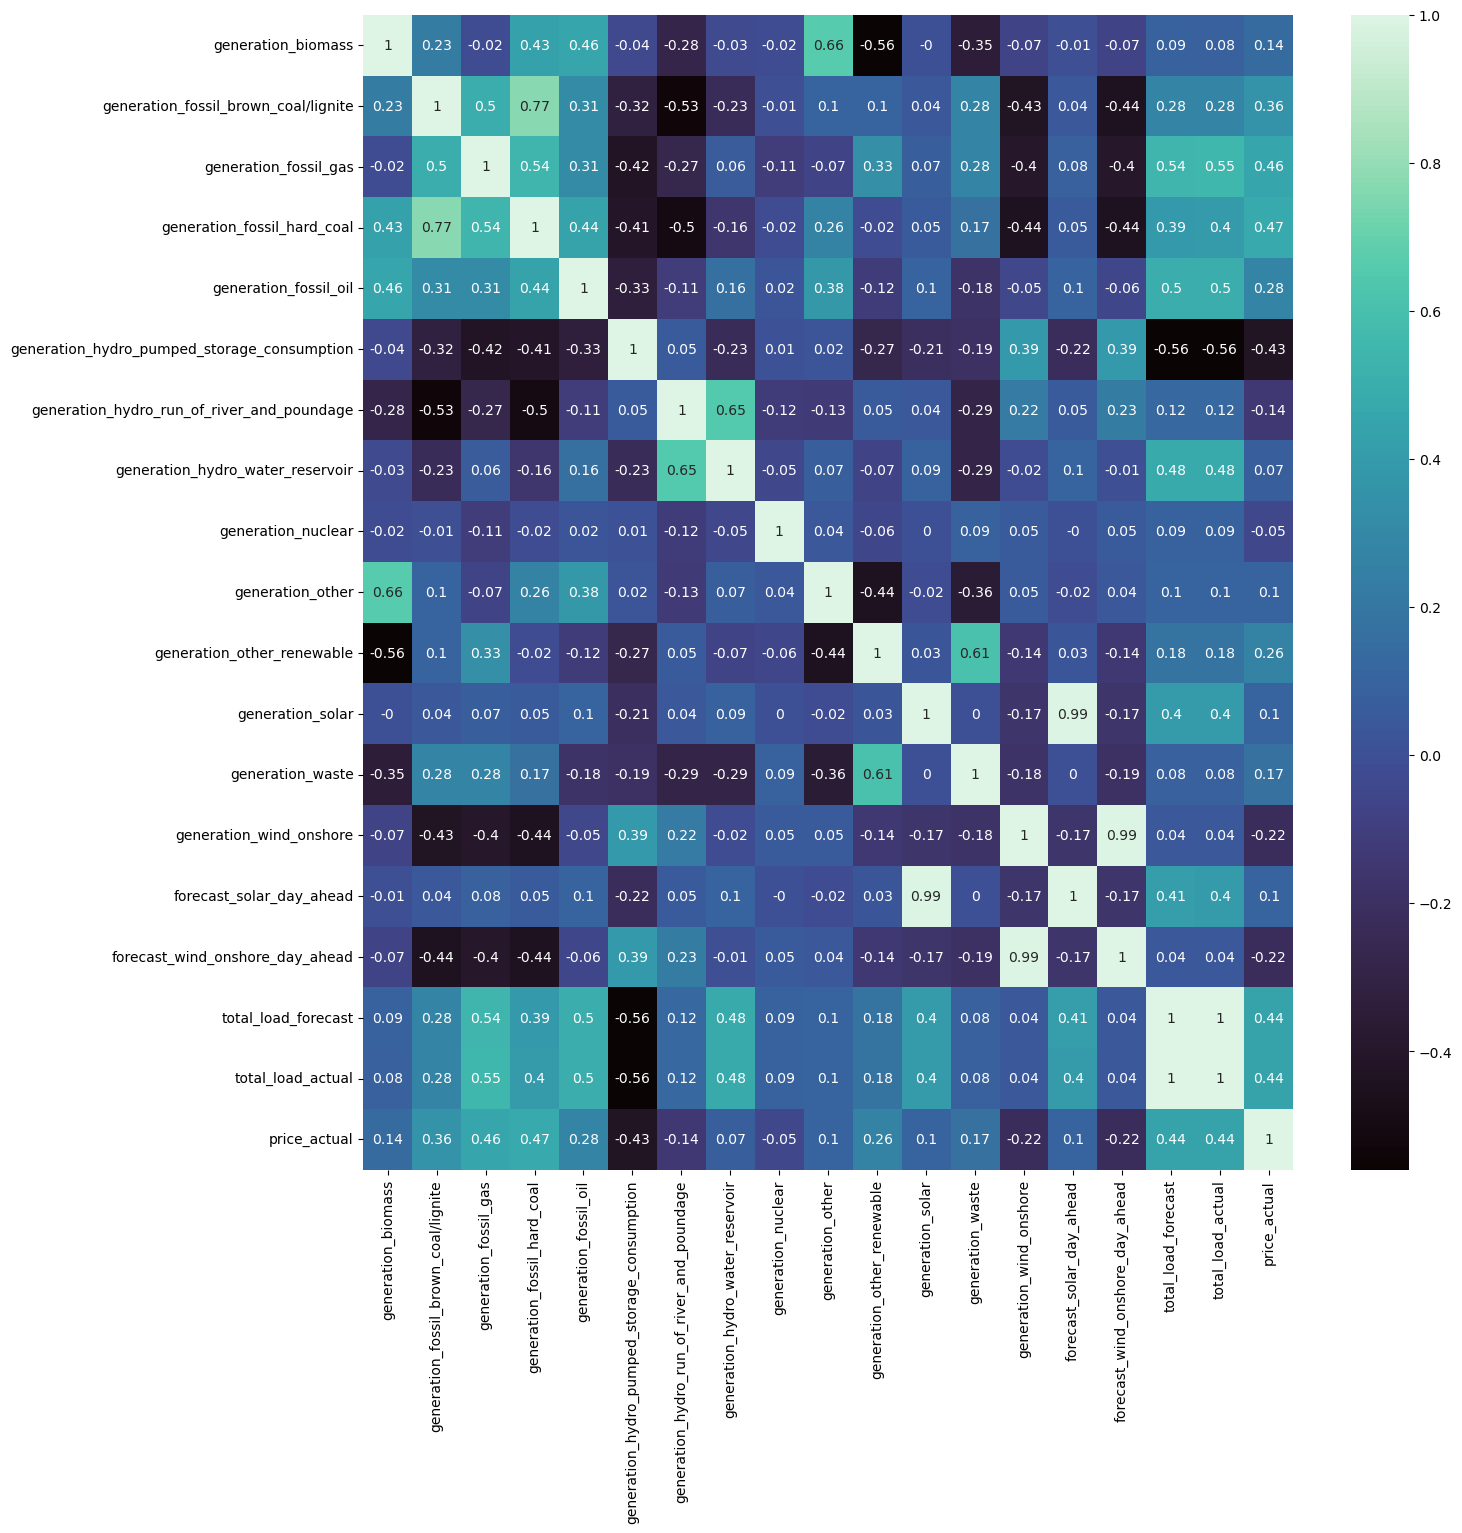

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True,cmap='mako')

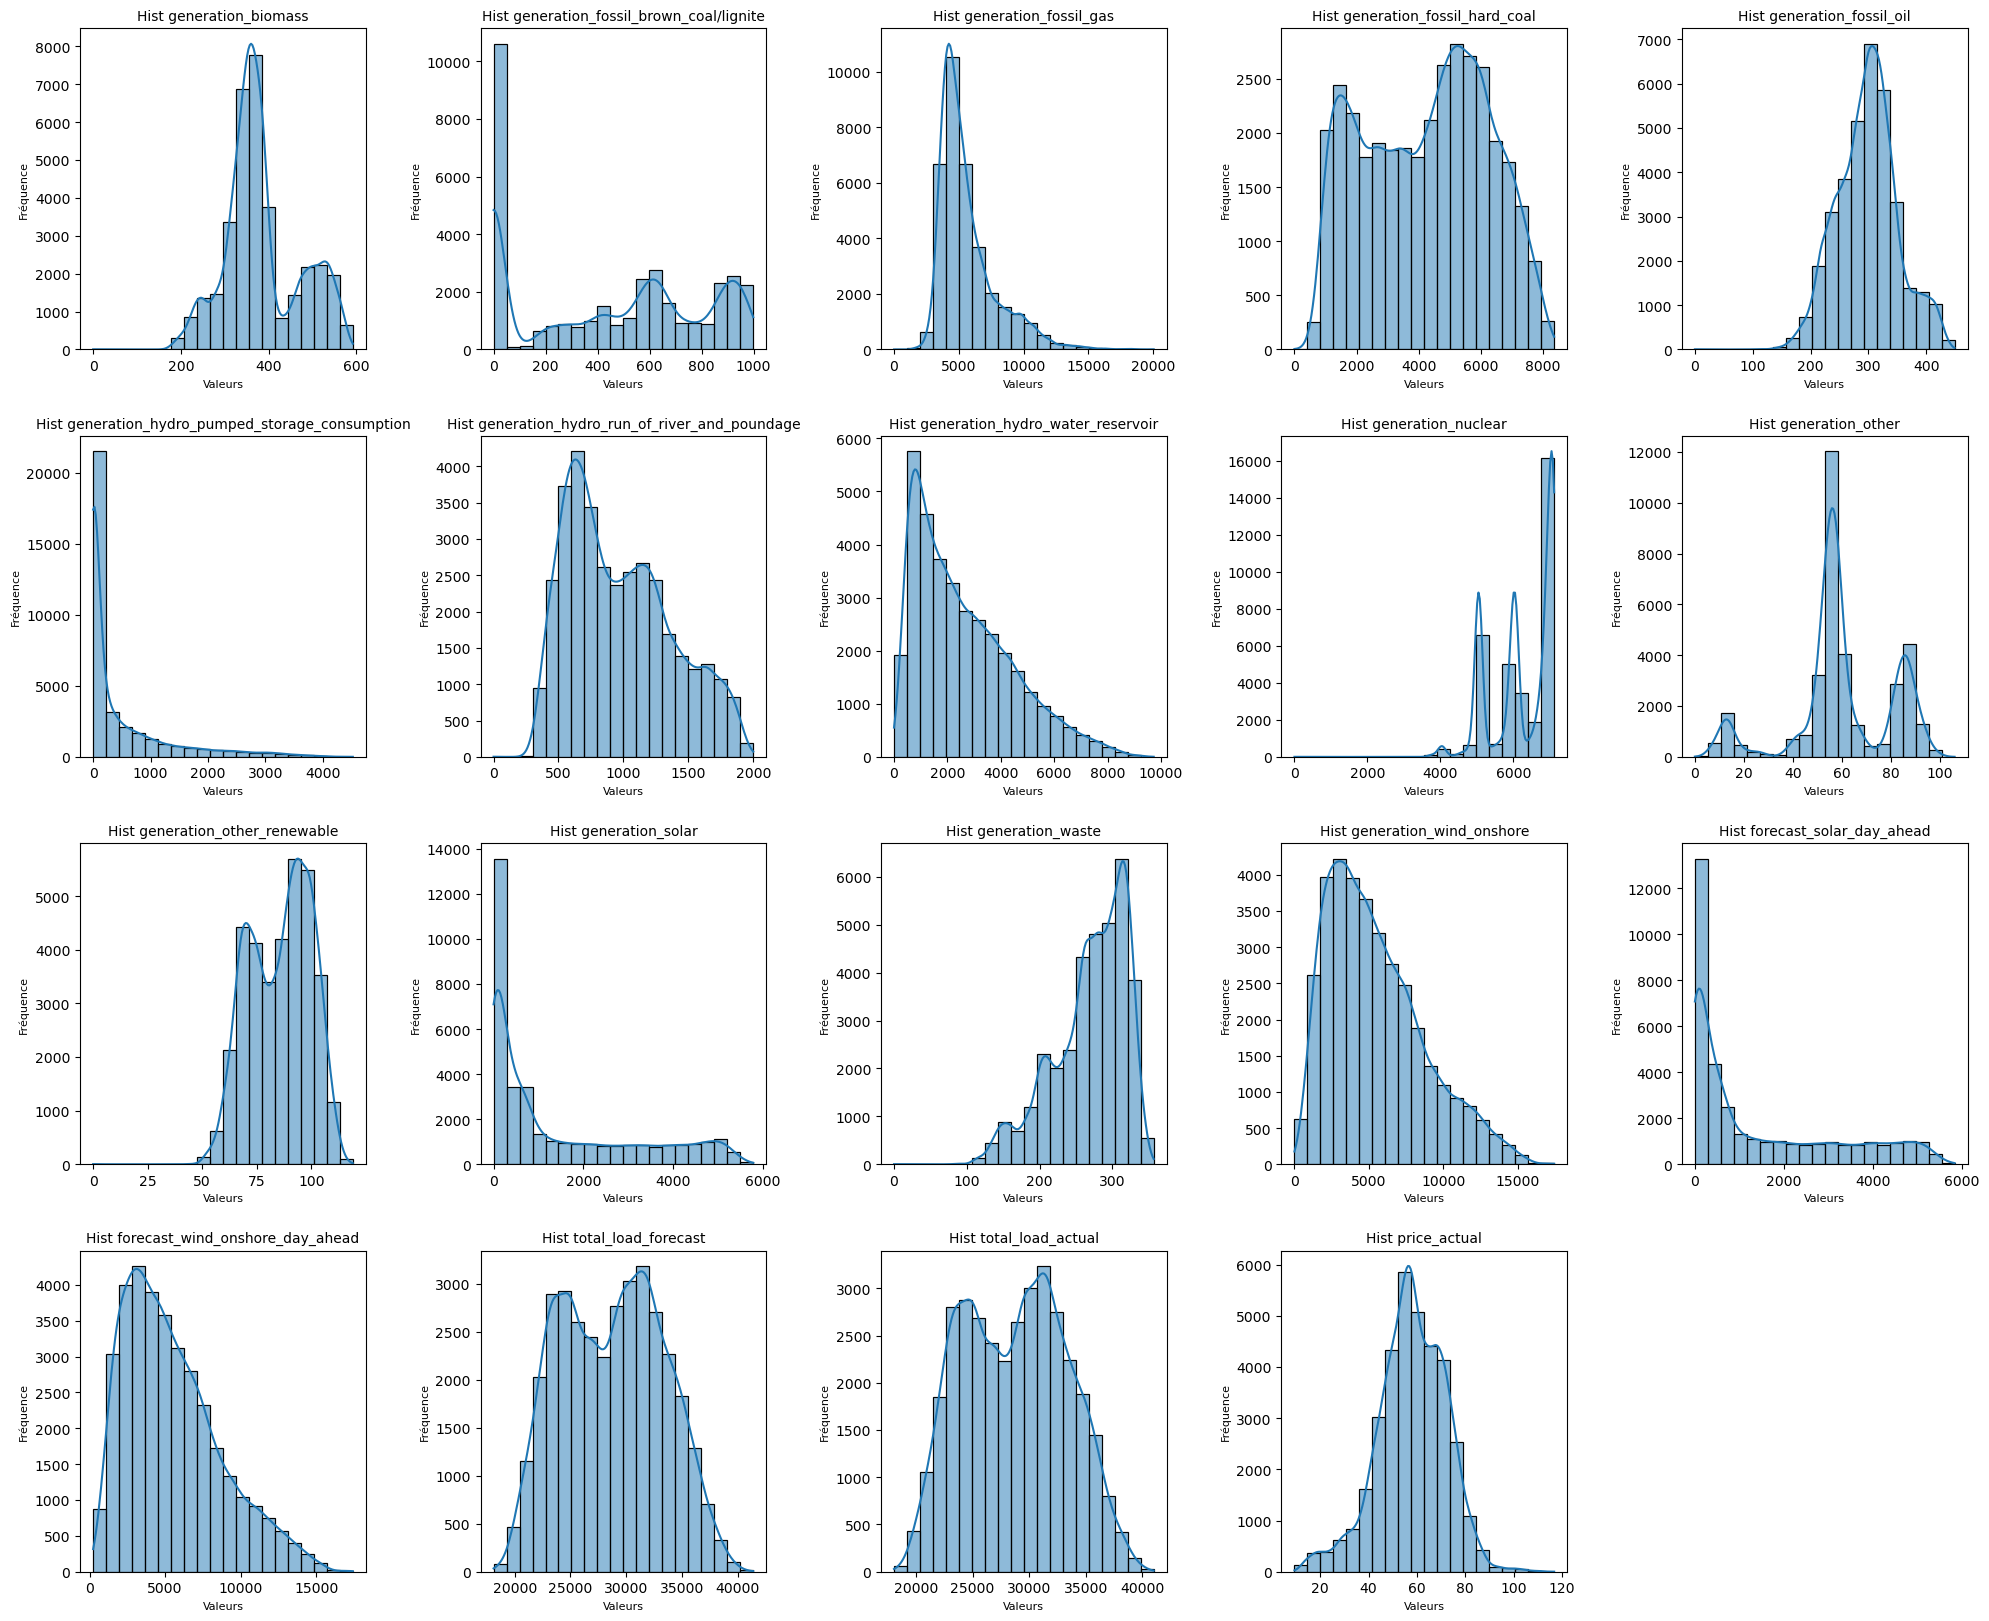

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))  

# Créer des sous-graphiques avec des ajustements
for i, col in enumerate(energy_dataset_C.columns):
    plt.subplot(5, 5, i + 1)  
    sns.histplot(data=energy_dataset_C[col].dropna(), bins=20, kde=True)
    
    
    plt.title(f"Hist {col}", fontsize=10)  
    
    
    plt.xlabel("Valeurs", fontsize=8)
    plt.ylabel("Fréquence", fontsize=8)


plt.tight_layout(h_pad=2, w_pad=2)  

# Afficher les graphiques
plt.show()


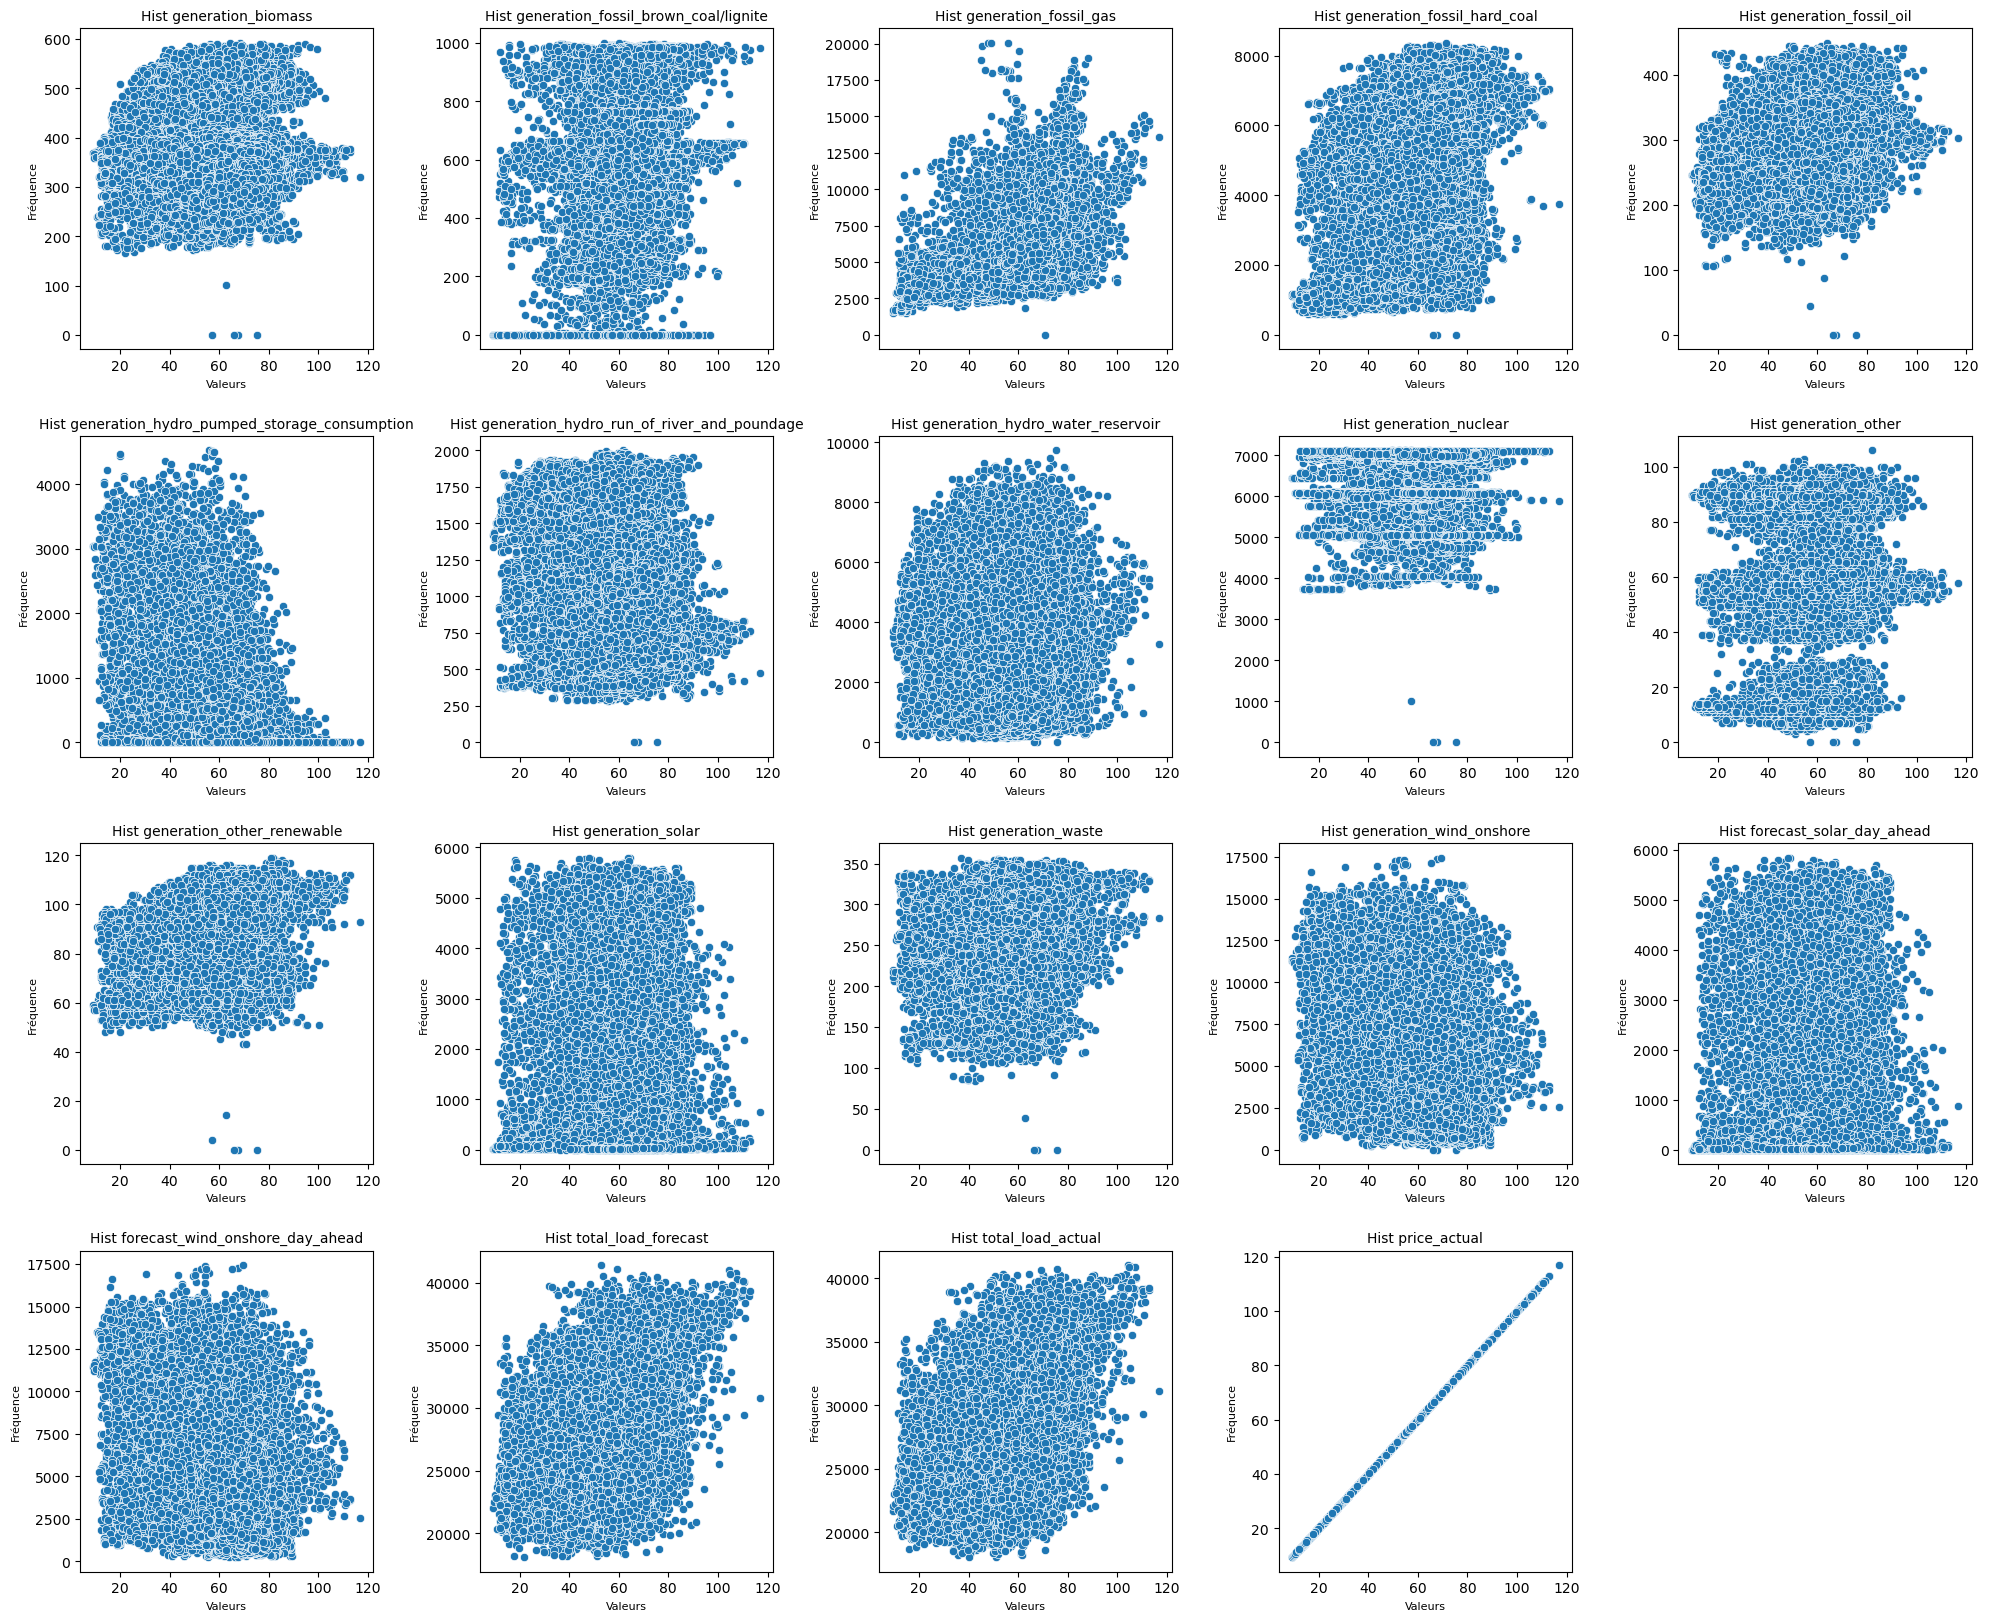

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))  

# Créer des sous-graphiques avec des ajustements
for i, col in enumerate(energy_dataset_C.columns):
    plt.subplot(5, 5, i + 1)  # Modifier pour afficher 25 sous-graphiques max
    sns.scatterplot(y=str(col),x="price_actual",data=energy_dataset_C)
    
    
    plt.title(f"Hist {col}", fontsize=10)  
    
    
    plt.xlabel("Valeurs", fontsize=8)
    plt.ylabel("Fréquence", fontsize=8)


plt.tight_layout(h_pad=2, w_pad=2)  

# Afficher les graphiques
plt.show()


# Baseline - Creation du pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Identification des variables categoriels et numerique 
y = pd.DataFrame(energy_dataset_C['price_actual'])
X = pd.DataFrame(energy_dataset_C.drop(columns='price_actual'))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

#defintion des variables numérique et categorielle

categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

print('categorical columns :', categorical_cols)
print('numerical columns :', numerical_cols)

#Preprocessing

Nump_trans = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Nump_trans, numerical_cols),
        ('normalize',scaler,numerical_cols),
    ],
    remainder='drop')
preprocessor.set_output(transform="pandas")

preprocessor.fit_transform(X_train,y_train)
preprocessor

categorical columns : []
numerical columns : ['generation_biomass', 'generation_fossil_brown_coal/lignite', 'generation_fossil_gas', 'generation_fossil_hard_coal', 'generation_fossil_oil', 'generation_hydro_pumped_storage_consumption', 'generation_hydro_run_of_river_and_poundage', 'generation_hydro_water_reservoir', 'generation_nuclear', 'generation_other', 'generation_other_renewable', 'generation_solar', 'generation_waste', 'generation_wind_onshore', 'forecast_solar_day_ahead', 'forecast_wind_onshore_day_ahead', 'total_load_forecast', 'total_load_actual']


ColumnTransformer(transformers=[('num', SimpleImputer(strategy='median'),
                                 ['generation_biomass',
                                  'generation_fossil_brown_coal/lignite',
                                  'generation_fossil_gas',
                                  'generation_fossil_hard_coal',
                                  'generation_fossil_oil',
                                  'generation_hydro_pumped_storage_consumption',
                                  'generation_hydro_run_of_river_and_poundage',
                                  'generation_hydro_water_reservoir',
                                  'generation_n...
                                  'generation_hydro_pumped_storage_consumption',
                                  'generation_hydro_run_of_river_and_poundage',
                                  'generation_hydro_water_reservoir',
                                  'generation_nuclear', 'generation_other',
                                  'generation_other_renewable',
                                  'generation_solar', 'generation_waste',
                                  'generation_wind_onshore',
                                  'forecast_solar_day_ahead',
                                  'forecast_wind_onshore_day_ahead',
                                  'total_load_forecast',
                                  'total_load_actual'])])

# Baseline - Regression lineaire - Test 1 
precision R2 etait trop faible 

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error



# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define numerical columns for preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols)  
    ],
    remainder='passthrough'  
)

# Create the full pipeline with preprocessor and model 
pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('scaler', StandardScaler()),    
    ('model', LinearRegression())  
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)
imputed_X_train = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_train), columns=numerical_cols)



mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = pipeline.score(X_train, y_train)

# Output metrics

print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("mape: ", np.round(mape, 2))


RMSE:  11.27
R2:  0.38
mape:  0.18


# Baseline - Histogradient boosting regressor - Test 2


In [15]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Model pipeline
model = HistGradientBoostingRegressor()
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                              ]
                              )


my_pipeline.set_output(transform="pandas")


my_pipeline.fit(X_train,y_train)
# Predictions
y_pred = my_pipeline.predict(X_test)

# Evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = my_pipeline.score(X_train, y_train)

# Output metrics

print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("mape: ", np.round(mape, 2))


KeyboardInterrupt: 

# Baseline - Gradient Boost Test - Test 3

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define numerical columns for preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols)  # Impute missing values for numeric columns
    ],
    remainder='passthrough'  
)

# Create the full pipeline with preprocessor and model (use RandomForestRegressor here)
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing step (imputation here)
    ('scaler', StandardScaler()),    # Optional: Scaling after imputation
    ('model', GradientBoostingRegressor())  # Model step (RandomForestRegressor for regression)
])
pipeline.set_output(transform="pandas")
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# You can access the preprocessor's output (imputed data) using the pipeline steps
imputed_X_train = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_train), columns=numerical_cols)



mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = pipeline.score(X_train, y_train)
val_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
mean_val_score = val_scores.mean()
std_val_score = val_scores.std()

# Output metrics

print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("mape: ", np.round(mape, 2))
print(f"mean_val_score={mean_val_score}, std_val_score={std_val_score}")

RMSE:  9.54
R2:  0.58
mape:  0.15
  mean_val_score=0.5558032289850188, std_val_score=0.007956283966516922


# Definition du modèle le plus interessant en fonction du score R2, rmse et mape de la cross-validation 

On teste ici une multitude de modèle afin de pouvoir de les comparer en fonction des metrics 

In [20]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import pandas as pd
import numpy as np

model_à_tester=[GradientBoostingRegressor,HistGradientBoostingRegressor,LinearRegression,RandomForestRegressor,Ridge,Lasso]
y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')


# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define numerical columns for preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for i in model_à_tester:

    # Define the preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), numerical_cols)  # Impute missing values for numeric columns
        ],
        remainder='passthrough',
        verbose_feature_names_out=True 
    )

    # Create the full pipeline with preprocessor and model (use RandomForestRegressor here)
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Preprocessing step (imputation here)
        ('scaler', StandardScaler()),    # Optional: Scaling after imputation
        ('model', i())  # Model step (RandomForestRegressor for regression)
    ])
    pipeline.set_output(transform="pandas")
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # You can access the preprocessor's output (imputed data) using the pipeline steps
    imputed_X_train = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_train), columns=numerical_cols)

    

    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    scores = pipeline.score(X_train, y_train)
    val_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    mean_val_score = val_scores.mean()
    std_val_score = val_scores.std()

    # Output metrics
    print(f"Model: {i.__name__}")
    print(f"RMSE: ", np.round(rmse, 2))
    print(f"R2:", np.round(scores, 2))
    print(f"mape: ", np.round(mape, 2))
    print(f"mean_val_score={mean_val_score}")
    print(f"std_val_score={std_val_score}")
    print("-" * 40)

Model: GradientBoostingRegressor
RMSE:  9.54
R2: 0.58
mape:  0.15
mean_val_score=0.555864113413256
std_val_score=0.007928394869859441
----------------------------------------
Model: HistGradientBoostingRegressor
RMSE:  7.67
R2: 0.76
mape:  0.11
mean_val_score=0.7105509183198986
std_val_score=0.005650146585045177
----------------------------------------
Model: LinearRegression
RMSE:  11.27
R2: 0.38
mape:  0.18
mean_val_score=0.37810933865848406
std_val_score=0.011535435187642176
----------------------------------------
Model: RandomForestRegressor
RMSE:  5.79
R2: 0.98
mape:  0.08
mean_val_score=0.8170470433612831
std_val_score=0.007059658481337336
----------------------------------------
Model: Ridge
RMSE:  11.27
R2: 0.38
mape:  0.18
mean_val_score=0.37811049978654826
std_val_score=0.01153556459204535
----------------------------------------
Model: Lasso
RMSE:  11.46
R2: 0.35
mape:  0.19
mean_val_score=0.34821416433411767
std_val_score=0.0075350146131017
--------------------------------

Suite à l'entrainement, nous avons décider de poursuivre notre analyse avec un HistGradientBoostingRegressor car ce modèle au dela bien saisir la predictabilité, il nous offre une bonne stabilité 

In [75]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Model pipeline
model = HistGradientBoostingRegressor()
my_pipeline = Pipeline(steps=[
                            ('preprocessor', preprocessor),
                            ('model', model)
                            ])
my_pipeline.set_output(transform="pandas")

my_pipeline.fit(X_train,y_train)
# Predictions
y_pred = my_pipeline.predict(X_test)

# Evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = my_pipeline.score(X_train, y_train)

# Output metrics

print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("mape: ", np.round(mape, 2))


RMSE:  6.98
R2:  0.81
mape:  0.1


# Grid Search - paramètres tunning


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing step
    ('scaler', StandardScaler()),    # Optional: Scaling step
    ('model', HistGradientBoostingRegressor())  # Model step
])

# Define the parameter grid
param_grid = {
    'model__learning_rate': [0.1, 0.05, 0.02, 0.01],
    'model__max_iter': [100, 200, 300, 400, 500],
    'model__max_leaf_nodes': [100, 200, 300, 400, 500],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Evaluate on the test set


print("Best Params:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Test Set Score:", grid_search.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=100; total time=   1.9s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=100; total time=   1.9s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=100; total time=   1.9s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=100; total time=   2.0s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=100; total time=   2.0s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=200; total time=   3.3s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=200; total time=   3.4s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=200; total time=   3.4s
[CV] END model__learning_rate=0.1, model__max_iter=100, model__max_leaf_nodes=200; total time=   3.3s
[CV] END model__lea

# Random search paramètre tunnning

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import random
param_distributions = {
'model__max_iter': randint(10, 1000),
'model__max_leaf_nodes':randint(10,500),
'model__learning_rate':uniform(0.01, 0.2)
}
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)
print("Test Set Score:", random_search.best_estimator_.score(X_test, y_test))

{'model__learning_rate': 0.10501239902818588, 'model__max_iter': 795, 'model__max_leaf_nodes': 108} 0.8766409365011659
0.8974114545826004


In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

# Define parameter distributions
param_distributions = {
    'model__max_iter': randint(10, 1000),
    'model__max_leaf_nodes': randint(10, 500),
    'model__learning_rate':uniform(0.01, 0.2)  
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,  # The pipeline you created earlier
    param_distributions=param_distributions,
    n_iter=10,  # Number of iterations (can increase for more exploration)
    cv=5,       # Cross-validation with 5 folds
    n_jobs=-1   # Parallel processing
)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and scores
print("Best Params:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)
print("Test Set Score:", random_search.best_estimator_.score(X_test, y_test))


Best Params: {'model__learning_rate': 0.20568060108852002, 'model__max_iter': 911, 'model__max_leaf_nodes': 136}
Best Cross-Validation Score: 0.8665342638038986
Test Set Score: 0.8895628917302159


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error


X= energy_dataset_C.drop(columns='price_actual')
y=energy_dataset_C['price_actual']

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, shuffle=True,random_state=42)


model= GradientBoostingRegressor(n_estimators=50)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])


my_pipeline.fit(X_train, y_train)

y_pred = my_pipeline.predict(X_test)


mse = mean_absolute_percentage_error(y_test, y_pred)
rmse =root_mean_squared_error(y_test,y_pred)
R2=my_pipeline.score(X_train,y_train)
print("RMSE: ", np.round(rmse, 2))
print(R2)




time
2018-10-26 06:00:00+00:00    81.90
2015-04-12 09:00:00+00:00    46.10
2018-10-16 16:00:00+00:00    82.42
2017-07-09 13:00:00+00:00    51.03
2018-05-10 22:00:00+00:00    67.30
                             ...  
2016-12-03 01:00:00+00:00    58.05
2015-09-19 00:00:00+00:00    51.11
2016-04-15 03:00:00+00:00    28.08
2015-02-05 19:00:00+00:00    79.39
2016-10-20 02:00:00+00:00    51.23
Name: price_actual, Length: 24544, dtype: float64
RMSE:  8.97
0.6294510196940396


# Modèle Finale

In [22]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Model pipeline
model = HistGradientBoostingRegressor(learning_rate= 0.20568060108852002, max_iter=911, max_leaf_nodes= 136)
my_pipeline = Pipeline(steps=[
                            ('preprocessor', preprocessor),
                            ('model', model)
                            ])
my_pipeline.set_output(transform="pandas")

my_pipeline.fit(X_train,y_train)
# Predictions
y_pred = my_pipeline.predict(X_test)

# Evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = my_pipeline.score(X_train, y_train)
val_scores = cross_val_score(my_pipeline, X_train, y_train, cv=5)
mean_val_score = val_scores.mean()
std_val_score = val_scores.std()

# Output metrics

print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("mape: ", np.round(mape, 2))
 
print(f"mean_val_score={mean_val_score}")
print(f"std_val_score={std_val_score}")



RMSE:  5.12
R2:  0.99
mape:  0.07
mean_val_score=0.8451250913167259
std_val_score=0.004292542585976599


# Ajout de Features saison

In [16]:
# Sort index
energy_dataset_C= energy_dataset_C.sort_index()
    
    # Set conditional satements for filtering times of month to season value
condition_winter = (energy_dataset_C.index.month>=1)&(energy_dataset_C.index.month<=3)
condtion_spring = (energy_dataset_C.index.month>=4)&(energy_dataset_C.index.month<=6)
condition_summer = (energy_dataset_C.index.month>=7)&(energy_dataset_C.index.month<=9)
condition_automn = (energy_dataset_C.index.month>=10)@(energy_dataset_C.index.month<=12)

# Create column in dataframe that inputs the season based on the conditions created above
energy_dataset_C['season'] = np.where(condition_winter,'winter',
                        np.where(condtion_spring,'spring',
                                     np.where(condition_summer,'summer',
                                              np.where(condition_automn,'automn',np.nan))))
energy_dataset_C 

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_actual,season
time,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,65.41,automn
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,64.92,winter
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,64.48,winter
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,59.32,winter
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,56.04,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,77.02,automn
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,76.16,automn
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,74.30,automn


# model avec season 

In [17]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Model pipeline
model = HistGradientBoostingRegressor(learning_rate= 0.20568060108852002, max_iter=911, max_leaf_nodes= 136)

onehot_encoder =  OneHotEncoder(handle_unknown='ignore',sparse_output=False)

# Define numerical columns for preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[('encoder',onehot_encoder,categorical_cols),  
                ('num', SimpleImputer(strategy='mean'), numerical_cols)  # Impute missing values for numeric columns
    ],
    remainder='passthrough'  
)



my_pipeline = Pipeline(steps=[
                            ('preprocessor', preprocessor),
                            ('model', model)
                            ])
my_pipeline.set_output(transform="pandas")

my_pipeline.fit(X_train,y_train)
# Predictions
y_pred = my_pipeline.predict(X_test)

# Evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = my_pipeline.score(X_train, y_train)
val_scores = cross_val_score(my_pipeline, X_train, y_train, cv=5)
mean_val_score = val_scores.mean()
std_val_score = val_scores.std()

# Output metrics

print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("mape: ", np.round(mape, 2))
 
print(f"mean_val_score={mean_val_score}")
print(f"std_val_score={std_val_score}")




KeyboardInterrupt: 

In [ ]:
# mlflow for Tracking 

In [18]:
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder

# Initialize MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Assurez-vous que le serveur MLflow est en cours d'exécution
mlflow.end_run()
mlflow.start_run()  # Commence une nouvelle exécution

# Définition des données
y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Modèle pipeline
model = HistGradientBoostingRegressor(learning_rate=0.20568060108852002, max_iter=911, max_leaf_nodes=136)

onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Définir les colonnes numériques pour le prétraitement
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                    X_train[cname].dtype == "object"]

# Définir le pipeline de prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', onehot_encoder, categorical_cols),  
        ('num', SimpleImputer(strategy='mean'), numerical_cols)  # Impute missing values for numeric columns
    ],
    remainder='passthrough'  
)

my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
my_pipeline.set_output(transform="pandas")

# Entraînement du modèle
my_pipeline.fit(X_train, y_train)

# Prédictions
y_pred = my_pipeline.predict(X_test)

# Évaluation des métriques
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = my_pipeline.score(X_train, y_train)
val_scores = cross_val_score(my_pipeline, X_train, y_train, cv=5)
mean_val_score = val_scores.mean()
std_val_score = val_scores.std()

# Log des métriques et des paramètres dans MLflow
mlflow.log_param("learning_rate", model.learning_rate)
mlflow.log_param("max_iter", model.max_iter)
mlflow.log_param("max_leaf_nodes", model.max_leaf_nodes)
mlflow.log_metric("RMSE", rmse)
mlflow.log_metric("R2", scores)
mlflow.log_metric("MAPE", mape)
mlflow.log_metric("mean_val_score", mean_val_score)
mlflow.log_metric("std_val_score", std_val_score)

# Fin de l'exécution MLflow
mlflow.end_run()

# Sortie des métriques
print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("MAPE: ", np.round(mape, 2))
print(f"mean_val_score={mean_val_score}")
print(f"std_val_score={std_val_score}")


KeyboardInterrupt: 

In [20]:
mlflow.end_run()

In [2]:
import mlflow
print(mlflow.__version__)


2.16.2


Set experience ml energie- test concluant

In [ ]:
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder



mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
mlflow.end_run()
mlflow.set_experiment("ML project energie")
# Start an MLflow run
with mlflow.start_run():
    
    mlflow.set_tag("Model type", "HistGradientBoostingRegressor")
   

    y = energy_dataset_C['price_actual']
    X = energy_dataset_C.drop(columns='price_actual')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

    # Modèle pipeline
    model = HistGradientBoostingRegressor(learning_rate=0.20568060108852002, max_iter=911, max_leaf_nodes=136)
    
    mlflow.log_param("learning_rate", model.learning_rate)
    mlflow.log_param("max_iter", model.max_iter)
    mlflow.log_param("max_leaf_nodes", model.max_leaf_nodes)
    onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Définir les colonnes numériques pour le prétraitement
    numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

    # Définir le pipeline de prétraitement
    preprocessor = ColumnTransformer(
        transformers=[
            ('encoder', onehot_encoder, categorical_cols),  
            ('num', SimpleImputer(strategy='mean'), numerical_cols)  # Impute missing values for numeric columns
        ],
        remainder='passthrough'  
    )

    my_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    my_pipeline.set_output(transform="pandas")

    # Entraînement du modèle
    my_pipeline.fit(X_train, y_train)
    y_pred = my_pipeline.predict(X_test)

    # Évaluation des métriques
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    scores = my_pipeline.score(X_train, y_train)
    val_scores = cross_val_score(my_pipeline, X_train, y_train, cv=5)
    mean_val_score = val_scores.mean()
    std_val_score = val_scores.std()
    
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", scores)
    mlflow.log_metric("MAPE", mape)
    mlflow.log_metric("mean_val_score", mean_val_score)
    mlflow.log_metric("std_val_score", std_val_score)

Autolag à run : Ne pas oublier de mettre le port local 

In [23]:
#mlflow autollog test
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder

# Assurez-vous que le serveur MLflow est en cours d'exécution sur le port 5001
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
mlflow.set_experiment("ML Energie")  # Créer ou sélectionner l'expérience

# Démarrer l'autologging
mlflow.autolog()

# Démarrer une exécution MLflow
with mlflow.start_run():

    # Charger vos données
    y = energy_dataset_C['price_actual']
    X = energy_dataset_C.drop(columns='price_actual')

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

    # Modèle pipeline
    model = HistGradientBoostingRegressor(learning_rate=0.20568060108852002, max_iter=911, max_leaf_nodes=136)

    onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Définir les colonnes numériques pour le prétraitement
    numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

    # Définir le pipeline de prétraitement
    preprocessor = ColumnTransformer(
        transformers=[
            ('encoder', onehot_encoder, categorical_cols),  
            ('num', SimpleImputer(strategy='mean'), numerical_cols)  # Impute missing values for numeric columns
        ],
        remainder='passthrough'  
    )

    my_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Entraînement du modèle
    my_pipeline.fit(X_train, y_train)

    # Prédictions
    y_pred = my_pipeline.predict(X_test)

    # Évaluation des métriques
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    scores = my_pipeline.score(X_train, y_train)
    val_scores = cross_val_score(my_pipeline, X_train, y_train, cv=5)
    mean_val_score = val_scores.mean()
    std_val_score = val_scores.std()

    # Sortie des métriques
    print("RMSE: ", np.round(rmse, 2))
    print("R2: ", np.round(scores, 2))
    print("MAPE: ", np.round(mape, 2))
    print(f"mean_val_score={mean_val_score}")
    print(f"std_val_score={std_val_score}")


/Users/cedric-omeryapo/opt/anaconda3/envs/MLproject/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/Users/cedric-omeryapo/opt/anaconda3/envs/MLproject/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


AttributeError: module 'mlflow' has no attribute 'autolog'

In [21]:
conda list 


/Users/cedric-omeryapo/opt/anaconda3/envs/MLproject/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=88269) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


# packages in environment at /Users/cedric-omeryapo/opt/anaconda3/envs/MLproject:
#
# Name                    Version                   Build  Channel
alembic                   1.13.3             pyhd8ed1ab_0    conda-forge
annotated-types           0.6.0           py312hecd8cb5_0  
anyio                     4.6.2           py312hecd8cb5_0  
appnope                   0.1.3           py312hecd8cb5_1001  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0          py312h6c40b1e_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
async-lru                 2.0.4           py312hecd8cb5_0  
attrs                     24.2.0          py312hecd8cb5_0  
babel                     2.11.0          py312hecd8cb5_0  
bcrypt                    3.2.0           py312h6c40b1e_1  
beautifulsoup4            4.12.3          py312hecd8cb5_0  
blas                      1.0                    openblas  
bleach                    4.1.0              pyhd3eb1

In [24]:
conda remove mlflow


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.9.2



## Package Plan ##

  environment location: /Users/cedric-omeryapo/opt/anaconda3/envs/MLproject

  removed specs:
    - mlflow


The following packages will be REMOVED:

  aiohappyeyeballs-2.4.0-py312hecd8cb5_0
  aiohttp-3.10.5-py312h46256e1_0
  aiosignal-1.2.0-pyhd3eb1b0_0
  alembic-1.13.3-py312hecd8cb5_0
  aniso8601-9.0.1-pyhd3eb1b0_0
  arrow-cpp-16.1.0-hc0a701b_0
  aws-c-auth-0.6.19-h6c40b1e_0
  aws-c-cal-0.5.20-h3333b6a_0
  aws-c-common-0.8.5-h6c40b1e_0
  aws-c-compression-0.2.16-h6c40b1e_0
  aws-c-event-stream-0.2.15-hcec6c5f_0
  aws-c-http-0.6.25-h6c40b1e_0
  aws-c-io-0.13.10-h6c40b1e_0
  aws-c-mqtt-0.7.13-h6c40b1e_0
  aws-c-s3-0.1.51-h6c40b1e_0
  aws-c-sdkutils-0.1.6-h6c

In [25]:
conda install -c conda-forge mlflow


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.9.2



## Package Plan ##

  environment location: /Users/cedric-omeryapo/opt/anaconda3/envs/MLproject

  added / updated specs:
    - mlflow


The following NEW packages will be INSTALLED:

  alembic            conda-forge/noarch::alembic-1.13.3-pyhd8ed1ab_0 
  bcrypt             pkgs/main/osx-64::bcrypt-3.2.0-py312h6c40b1e_1 
  blinker            conda-forge/noarch::blinker-1.8.2-pyhd8ed1ab_0 
  click              conda-forge/noarch::click-8.1.7-unix_pyh707e725_0 
  cloudpickle        conda-forge/noarch::cloudpickle-3.1.0-pyhd8ed1ab_1 
  configparser       conda-forge/noarch::configparser-7.1.0-pyhd8ed1ab_0 
  cryptography       pkgs/main/osx-64::cryptography-43.0.0-py312h30e54ef_0 

In [ ]:
mlflow.info

In [31]:
# Assign variables for baselines and calculate baselines

mean_pred = y_pred.mean()

baseline_rmse = root_mean_squared_error(y_test,y_pred)

# Print statement to show all baseline values
print('Mean Price Per KW/h Pred:', mean_pred)
print('-------------------------------------------------------------------')
print('RMSE:',baseline_rmse)

Mean Price Per KW/h Baseline Pred: 57.80200799337454
-------------------------------------------------------------------
RMSE: 4.480980333135677


Mean Price Per KW/h Baseline Pred: 57.912637711864406
-------------------------------------------------------------------
RMSE: 14.173160623162811


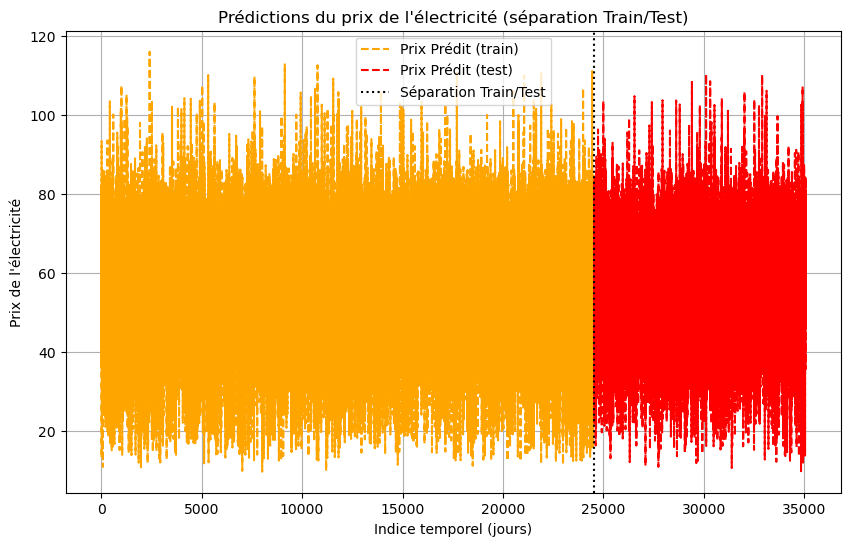

In [37]:
# Faire des prédictions pour le jeu de test (cela suppose que le modèle est déjà entraîné)
y_train_pred = my_pipeline.predict(X_train)  # Prédictions pour le jeu de train
y_test_pred = my_pipeline.predict(X_test)  # Faire des prédictions correctes sur le jeu de test

# Créer une liste des indices (jours ou observations) pour les parties train et test
train_indices = np.arange(len(y_train))
test_indices = np.arange(len(y_train), len(y_train) + len(y_test))  # Assure que la taille est la même que y_test et y_test_pred

# Tracer les résultats
plt.figure(figsize=(10, 6))

# Tracer les prédictions pour le train et le test
plt.plot(train_indices, y_train_pred, label='Prix Prédit (train)', linestyle='--', color='orange')
plt.plot(test_indices, y_test_pred, label='Prix Prédit (test)', linestyle='--', color='red')

# Ajouter une ligne de séparation entre la partie train et test
plt.axvline(x=len(y_train), color='black', linestyle=':', label='Séparation Train/Test')

# Ajouter des titres et des labels
plt.title("Prédictions du prix de l'électricité (séparation Train/Test)")
plt.xlabel("Indice temporel (jours)")
plt.ylabel("Prix de l'électricité")
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


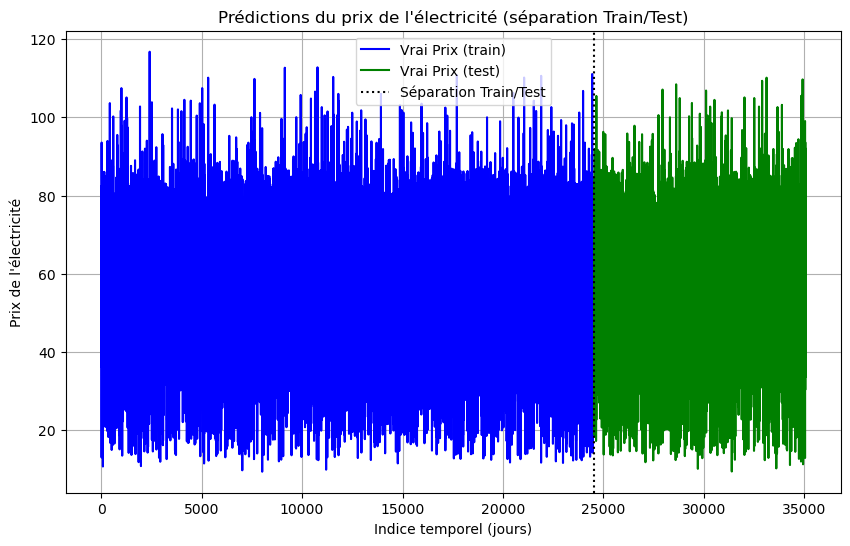

In [38]:
# Faire des prédictions pour le jeu de test (cela suppose que le modèle est déjà entraîné)
y_train_pred = my_pipeline.predict(X_train)  # Prédictions pour le jeu de train
y_test_pred = my_pipeline.predict(X_test)  # Faire des prédictions correctes sur le jeu de test

# Créer une liste des indices (jours ou observations) pour les parties train et test
train_indices = np.arange(len(y_train))
test_indices = np.arange(len(y_train), len(y_train) + len(y_test))  # Assure que la taille est la même que y_test et y_test_pred

# Tracer les résultats
plt.figure(figsize=(10, 6))

# Tracer les vrais prix pour le train et le test
plt.plot(train_indices, y_train, label='Vrai Prix (train)', color='blue')
plt.plot(test_indices, y_test, label='Vrai Prix (test)', color='green')

# Ajouter une ligne de séparation entre la partie train et test
plt.axvline(x=len(y_train), color='black', linestyle=':', label='Séparation Train/Test')

# Ajouter des titres et des labels
plt.title("Prédictions du prix de l'électricité (séparation Train/Test)")
plt.xlabel("Indice temporel (jours)")
plt.ylabel("Prix de l'électricité")
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

In [72]:
# Assign variables for baselines and calculate baselines
y_pred = [y_train.mean()]*len(y_train)
mean_pred = y_train.mean()

baseline_rmse = root_mean_squared_error(y_train,y_pred)

# Print statement to show all baseline values
print('Mean Price Per KW/h Baseline Pred:', mean_pred)
print('-------------------------------------------------------------------')
print('RMSE:',baseline_rmse)

Mean Price Per KW/h Baseline Pred: 57.912637711864406
-------------------------------------------------------------------
RMSE: 14.173160623162811


In [6]:
energy_dataset=energy_dataset.set_index("time")
energy_dataset

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,NaN,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,NaN,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,NaN,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30


In [123]:
weather_dataset=weather_dataset.reset_index().set_index("dt_iso")
weather_dataset



,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [40]:
dir(weather_dataset["weather_main"].unique())

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

In [26]:
weather_file = os.path.join(path, "weather_features.csv")
weather_dataset=pd.read_csv(weather_file)
weather_dataset
#drop empty columns
weather_dataset_C = weather_dataset.drop(columns=['pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all',
])

weather_dataset_C.columns = weather_dataset_C.columns.str.replace(' ','_').str.replace('-','_')
weather_dataset_C.set_index("time", inplace=True)
weather_dataset_C.describe(include="all")


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


Dataframe fusionner Debut de l'EDA

In [28]:
df=energy_dataset_C.merge(weather_dataset, left_on="time", right_on="dt_iso")

df

ValueError: You are trying to merge on datetime64[ns, UTC] and object columns for key 'time'. If you wish to proceed you should use pd.concat

EDA

In [85]:
output_path="/Users/cedric-omeryapo/Documents/Machine Learning Albert"
ProfileReport(energy_dataset_C).to_file(output_path)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/cedric-omeryapo/opt/anaconda3/envs/MLproject/lib/python3.9/site-packages/ydata_profiling/profile_report.py:378: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
weather_dataset.describe(include='all')

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
count,178396,178396,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396,178396,178396
unique,35064,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,43,24
top,2015-10-01 02:00:00+02:00,Madrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clear,sky is clear,01n
freq,10,36267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82685,82685,38541
mean,NaN,NaN,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902,NaN,NaN,NaN
std,NaN,NaN,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223,NaN,NaN,NaN
min,NaN,NaN,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,NaN,NaN,NaN
25%,NaN,NaN,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000,NaN,NaN,NaN
50%,NaN,NaN,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000,NaN,NaN,NaN
75%,NaN,NaN,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000,NaN,NaN,NaN


In [102]:
weather_dataset.dtypes


dt_iso                  object
city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [107]:
Categorical=[i for i in weather_dataset.columns if (weather_dataset[i].dtypes=="object")]
Categorical


['dt_iso', 'city_name', 'weather_main', 'weather_description', 'weather_icon']